Import Library

In [ ]:
!pip install Sastrawi
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import string
import re
import csv
import nltk
from io import StringIO
import requests
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Memuat Dataset

In [ ]:
app_reviews_df = pd.read_csv('Ulasan_Aplikasi_Tiktok.csv')
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4bf715bb-c9c0-4d81-8e2c-3791fe34ca9b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,39.8.4,2025-05-14 06:56:52,NaN,NaN,39.8.4
1,abbd86af-67c3-4c26-965c-f4b001554ae5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,personal,1,0,NaN,2025-05-14 03:01:16,NaN,NaN,NaN
2,b0f98638-ea55-40ba-acf5-9c10677d5860,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,4,0,NaN,2025-05-14 00:18:30,NaN,NaN,NaN
3,ac829602-f43b-4ddd-926d-a6e30345c148,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ya itu harus profesional,5,0,NaN,2025-05-13 23:03:42,NaN,NaN,NaN
4,48f6e86e-cdf0-436f-bb25-2cf9c60dd450,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus,5,0,NaN,2025-05-13 11:17:58,NaN,NaN,NaN


In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4bf715bb-c9c0-4d81-8e2c-3791fe34ca9b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,39.8.4,2025-05-14 06:56:52,NaN,NaN,39.8.4
1,abbd86af-67c3-4c26-965c-f4b001554ae5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,personal,1,0,NaN,2025-05-14 03:01:16,NaN,NaN,NaN
2,b0f98638-ea55-40ba-acf5-9c10677d5860,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,4,0,NaN,2025-05-14 00:18:30,NaN,NaN,NaN
3,ac829602-f43b-4ddd-926d-a6e30345c148,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ya itu harus profesional,5,0,NaN,2025-05-13 23:03:42,NaN,NaN,NaN
4,48f6e86e-cdf0-436f-bb25-2cf9c60dd450,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus,5,0,NaN,2025-05-13 11:17:58,NaN,NaN,NaN


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              9000 non-null   object
 1   userName              9000 non-null   object
 2   userImage             9000 non-null   object
 3   content               9000 non-null   object
 4   score                 9000 non-null   int64 
 5   thumbsUpCount         9000 non-null   int64 
 6   reviewCreatedVersion  5390 non-null   object
 7   at                    9000 non-null   object
 8   replyContent          1 non-null      object
 9   repliedAt             1 non-null      object
 10  appVersion            5390 non-null   object
dtypes: int64(2), object(9)
memory usage: 773.6+ KB


Pembersihan data

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.strip(' ')
    text = text.lower()
    return text

app_reviews_df['content'] = app_reviews_df['content'].apply(cleaningText)

In [ ]:
def casefoldingText(text):
    text = text.lower()
    return text

In [ ]:
def tokenizingText(text):
    text = word_tokenize(text)
    return text

In [ ]:
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

In [ ]:
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

In [ ]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
app_reviews_df['text_clean'] = app_reviews_df['content'].apply(cleaningText)
app_reviews_df['text_casefoldingText'] = app_reviews_df['text_clean'].apply(casefoldingText)
app_reviews_df['text_slangwords'] = app_reviews_df['text_casefoldingText'].apply(fix_slangwords)
app_reviews_df['text_tokenizingText'] = app_reviews_df['text_slangwords'].apply(tokenizingText)
app_reviews_df['text_stopword'] = app_reviews_df['text_tokenizingText'].apply(filteringText)
app_reviews_df['text_akhir'] = app_reviews_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df = app_reviews_df.drop_duplicates(subset=['text_akhir']).dropna(subset=['text_akhir'])

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(f"Jumlah ulasan setelah hapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")
print(f"Jumlah kolom setelah hapus duplikat: {jumlah_kolom_setelah_hapus_duplikat}")

Jumlah ulasan setelah hapus duplikat: 5182
Jumlah kolom setelah hapus duplikat: 17


Pelabelan Sentimen

In [ ]:
lexicon_negative = dict()
response_neg = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response_neg.status_code == 200:
    reader_neg = csv.reader(StringIO(response_neg.text), delimiter=',')

    for row in reader_neg:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
lexicon_positive = dict()
response_pos = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response_pos.status_code == 200:
    reader_pos = csv.reader(StringIO(response_pos.text), delimiter=',')

    for row in reader_pos:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    if not isinstance(text, str):
        return 'neutral'

    text_tokens = word_tokenize(text)

    for word in text_tokens:
        score += lexicon_positive.get(word, 0)
        score += lexicon_negative.get(word, 0)

    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

    return score, polarity

In [ ]:
clean_df['sentiment'] = clean_df['text_akhir'].apply(sentiment_analysis_lexicon_indonesia)
print(clean_df['sentiment'].value_counts())

sentiment
neutral     2118
negative    1613
positive    1451
Name: count, dtype: int64


Tokenisasi dan Padding

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(clean_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])
padded = pad_sequences(sequences, maxlen=200, truncating='post')

In [ ]:
# One-hot encode label
sentiment_labels = pd.get_dummies(clean_df['sentiment']).values

In [ ]:
# membagi data
X_train, X_test, y_train, y_test = train_test_split(padded, sentiment_labels, test_size=0.2, random_state=42)

Modeling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=200),
    # tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.4298 - loss: 1.0488 - val_accuracy: 0.5931 - val_loss: 0.8615
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.6086 - loss: 0.8435 - val_accuracy: 0.7242 - val_loss: 0.6984
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.7837 - loss: 0.5978 - val_accuracy: 0.7994 - val_loss: 0.5491
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.8853 - loss: 0.3755 - val_accuracy: 0.8293 - val_loss: 0.4841
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9313 - loss: 0.2418 - val_accuracy: 0.8496 - val_loss: 0.4326
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.9534 - loss: 0.1732 - val_accuracy: 0.8563 - val_loss: 0.4319
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.9682 - loss: 0.1286 - val_accuracy: 0.8370 - val_loss: 0.4551
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.9688 - loss: 0

Evaluasi

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy*100:.2f}%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8586 - loss: 0.4717
Akurasi: 85.73%


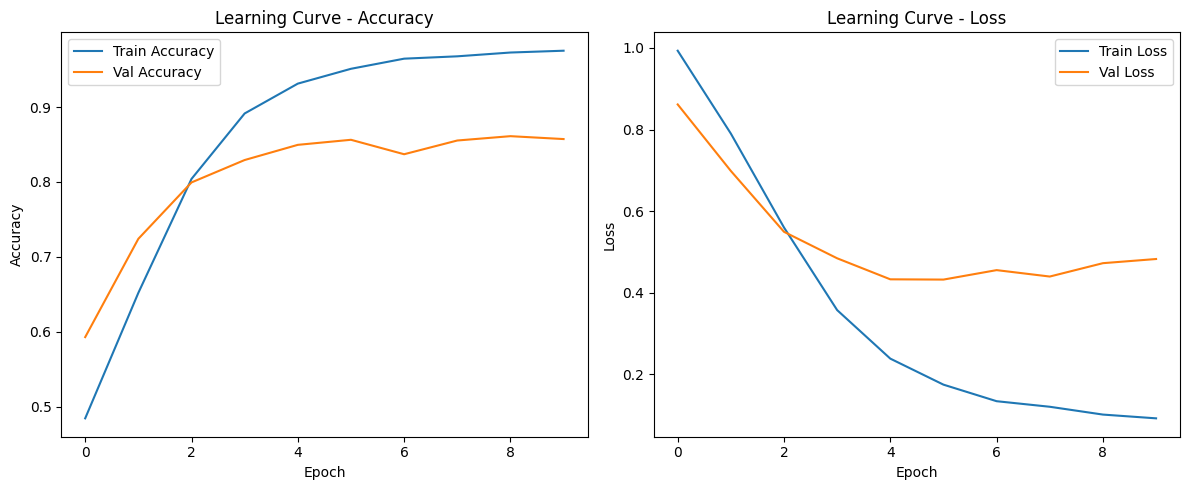

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


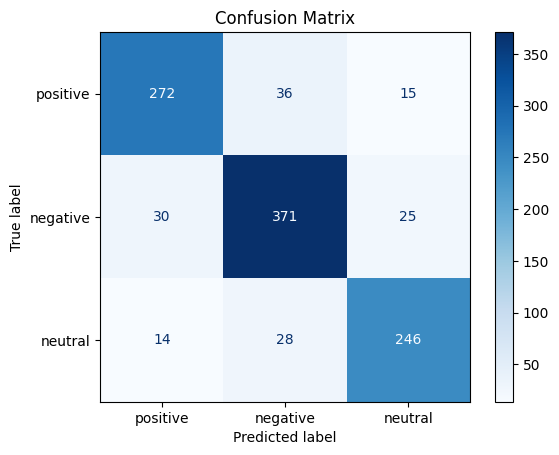

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'negative', 'neutral'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Inferensi

In [ ]:
def predict_sentiment(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = fix_slangwords(text)
    text_tokens = tokenizingText(text)
    text_filtered = filteringText(text_tokens)
    text_final = toSentence(text_filtered)

    sequence = tokenizer.texts_to_sequences([text_final])
    padded_seq = pad_sequences(sequence, maxlen=200, truncating='post')
    prediction = model.predict(padded_seq)
    label_index = np.argmax(prediction)
    labels = ['negative', 'neutral', 'positive']
    return labels[label_index]

In [ ]:
new_review = input("Masukkan Kalimat Baru:")
sentiment = predict_sentiment(new_review)
print(f"Sentimen Ulasan: {sentiment}")

Masukkan Kalimat Baru:lagi asik nonton malah keluar apklikasi sendiri
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sentimen Ulasan: positive
